# Introduction 
## Customer Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using [Churn_Modelling.csv]. We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.


Let's get started.

# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Exploratory Data Analysis
- Outliers using IQR method
- Cleaning and Transforming Data
    - One-hot Encoding
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Support Vector Classifier
- Prediction using Decision Tree Classifier
- Prediction using KNN Classifier
- Prediction using RandomForestClassifier
- Predticon using GradientBoostClassifier

## Importing Libraries

First of all, we will import knwon necessary libraries.

In [1]:
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

## Exploratory Data Analysis

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory
 
There are 10000 customers in the dataset and 13 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [6]:
df.size

140000

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Blance and EstimatedSalary is given as object datatype but it is float datatype

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum()

0

#### Basic Data Cleaning: 
As we have already observered in above cell that Balance and EstimatedSalary is given as object datatype but it is float datatype. We will fix it here.

In [13]:
df['Balance'].dtype

dtype('float64')

In [14]:
df['EstimatedSalary'].dtype

dtype('float64')

In [17]:
df['Balance'] = pd.to_numeric(df['Balance'],errors = 'coerce')


In [18]:
df['Balance'].dtype

dtype('float64')

In [19]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'],errors = 'coerce')


In [21]:
df['EstimatedSalary'].dtype

dtype('float64')

In [38]:
categorical_features = [
   'Geography',# Represents the country of the customer.
   'Gender'   # Represents the gender of the customer.
]
numerical_features = ['CreditScore' , 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target = "Exited"

In [23]:
df.skew(numeric_only= True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [24]:
df.corr(numeric_only= True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### Feature distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

#### Numerical features distribution

Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [25]:
df[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

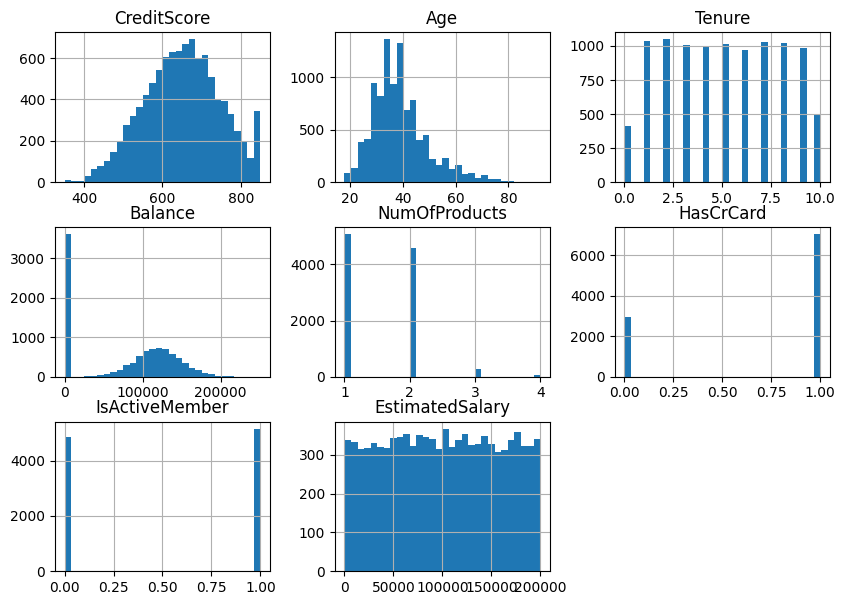

In [26]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

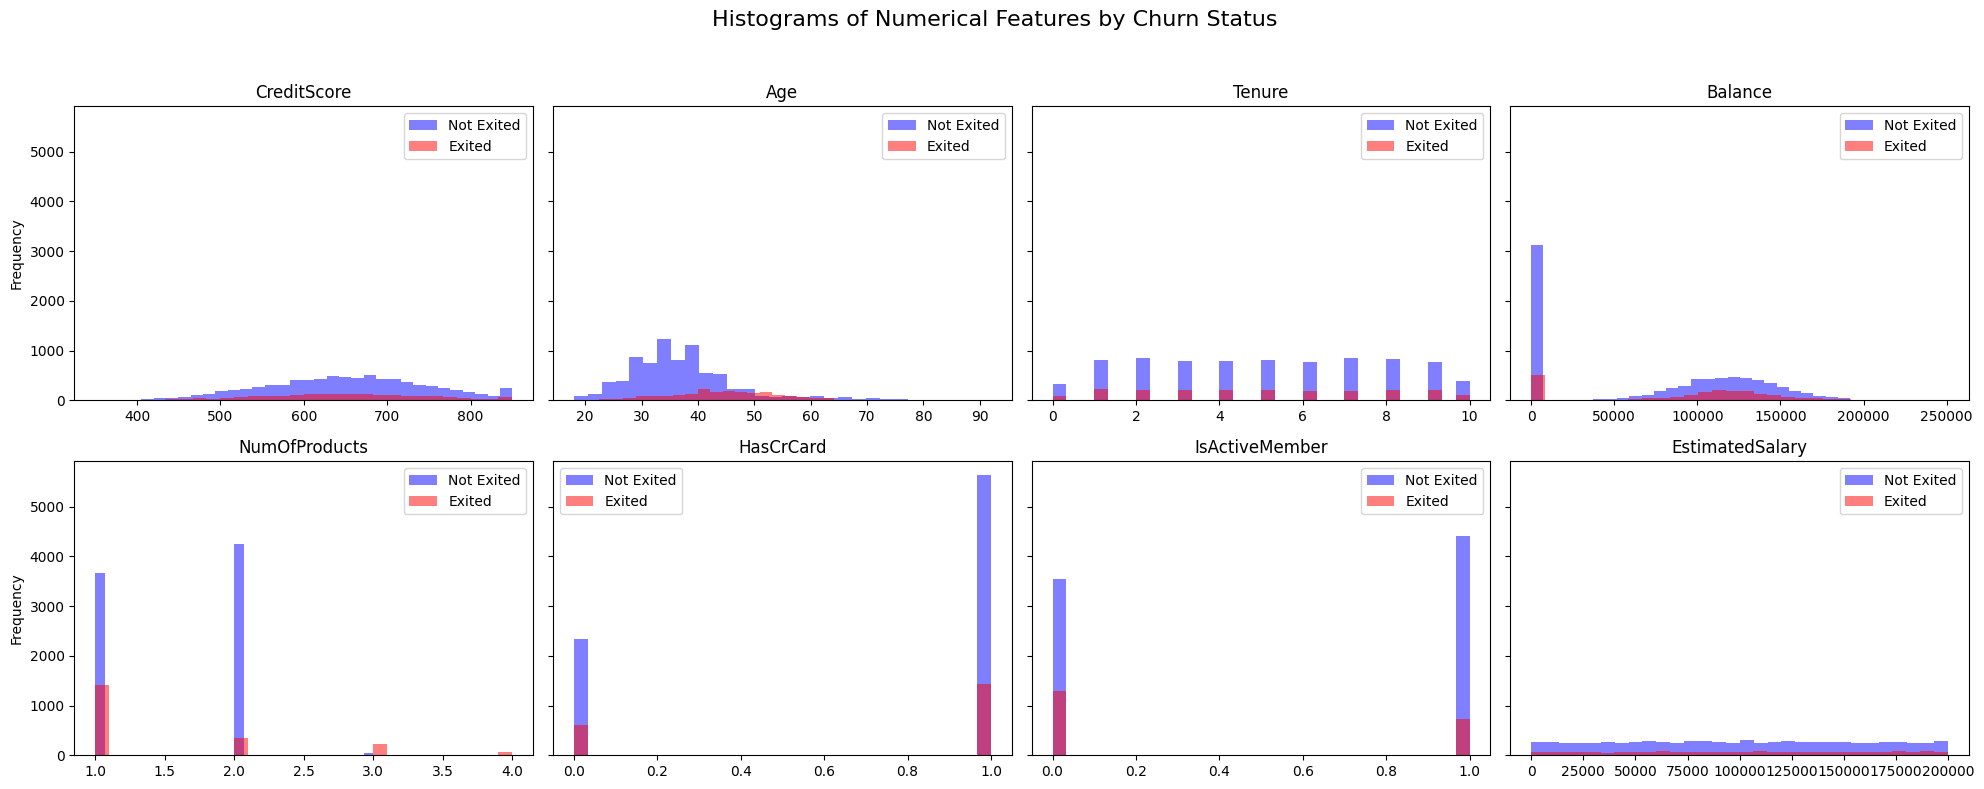

In [33]:
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 8), sharey=True)
fig.suptitle('Histograms of Numerical Features by Churn Status', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    df[df['Exited'] == 0][feature].plot(kind='hist', bins=30, color='blue', alpha=0.5, ax=ax, label='Not Exited')
    df[df['Exited'] == 1][feature].plot(kind='hist', bins=30, color='red', alpha=0.5, ax=ax, label='Exited')
    ax.set_title(feature)
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

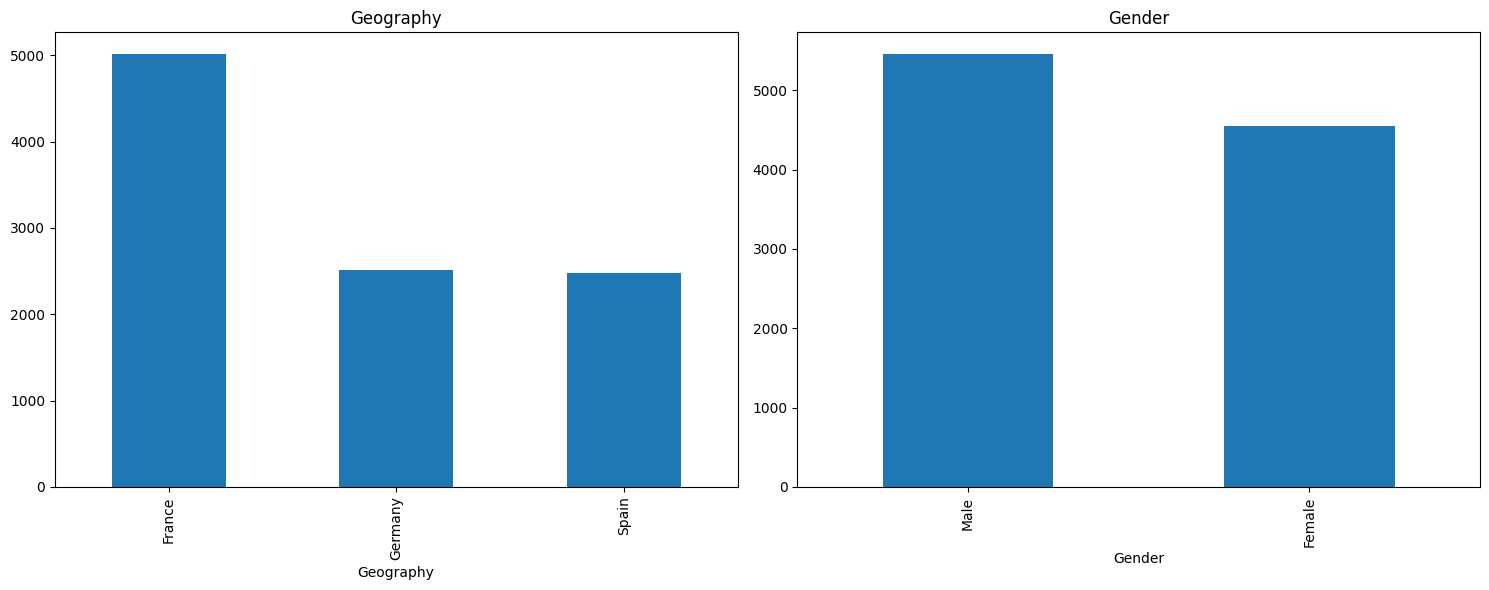

In [40]:
import matplotlib.pyplot as plt

categorical_features = ['Geography', 'Gender']
ROWS, COLS = 1, len(categorical_features)
fig, ax = plt.subplots(ROWS, COLS, figsize=(15, 6))

for i, categorical_feature in enumerate(categorical_features):
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(categorical_feature)

plt.tight_layout()
plt.show()


The next step is to look at categorical features in relation to the target variable. We do this for geography and gender feature. 

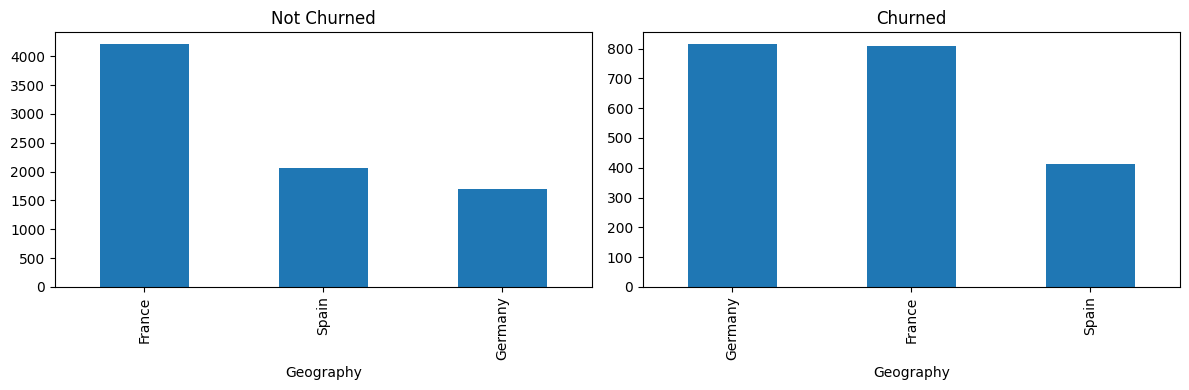

In [44]:
feature = 'Geography'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df['Exited'] == 0][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('Not Churned')
df[df['Exited'] == 1][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('Churned')
plt.tight_layout()
plt.show()


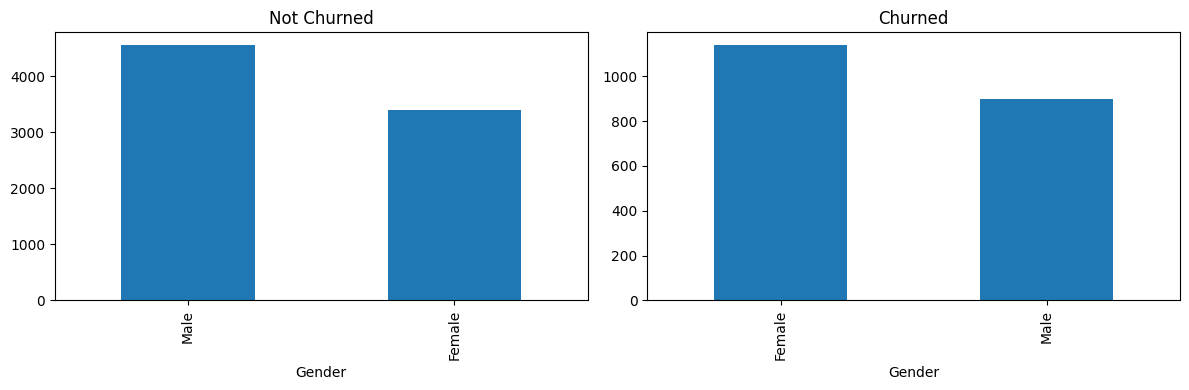

In [45]:
feature = 'Gender'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df['Exited'] == 0][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('Not Churned')
df[df['Exited'] == 1][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('Churned')
plt.tight_layout()
plt.show()


### Target variable distribution

Text(0.5, 1.0, 'churned')

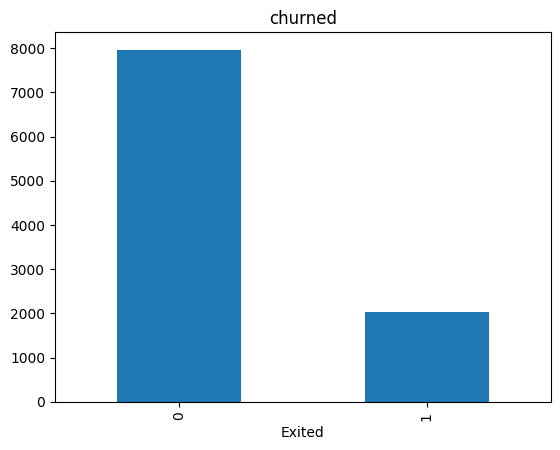

In [48]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:
- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

## Outliers Analysis with IQR Method

In [54]:
x = ['CreditScore' , 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
def count_outliers(data,col):
        q1 = df[col].quantile(0.25,interpolation='nearest')
        q2 = df[col].quantile(0.5,interpolation='nearest')
        q3 = df[col].quantile(0.75,interpolation='nearest')
        q4 = df[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if df[col].min() > LLP and df[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = df[df[col]<LLP][col].size
            y = df[df[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

There are outliers in CreditScore
Count of outliers are: 15
There are outliers in Age
Count of outliers are: 359
No outliers in Tenure
No outliers in Balance
There are outliers in NumOfProducts
Count of outliers are: 60
No outliers in HasCrCard
No outliers in IsActiveMember
No outliers in EstimatedSalary


In [55]:
# removing Outliers
def remove_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# remove for each column
for col in x:
    df = remove_outliers(df, col)

# Shape after
print("Shape of dataframe after removing outliers:", df.shape)


Shape of dataframe after removing outliers: (9568, 14)


## Cleaning and Transforming Data

In [58]:
df.drop(['CustomerId'],axis = 1,inplace = True)

In [59]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.drop(['Surname'],axis = 1,inplace = True)

In [65]:
df.drop(['RowNumber'],axis=1,inplace=True)

#### Dropped customerID , surname and Rownumber because it is not needed

### On Hot Encoding

In [66]:
df1=pd.get_dummies(data=df,columns=['Gender', 'Geography', 'Exited'], drop_first=True)

In [67]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Exited_1
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,True
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False


In [68]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Male', 'Geography_Germany',
       'Geography_Spain', 'Exited_1'],
      dtype='object')

### Rearranging Columns

In [69]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Exited_1
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,True
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False


In [70]:
df1.shape

(9568, 12)

In [71]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.EstimatedSalary = imputer.fit_transform(df1["EstimatedSalary"].values.reshape(-1, 1))
#x = ['CreditScore' , 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']


In [72]:
df1.Balance = imputer.fit_transform(df1["Balance"].values.reshape(-1, 1))
df1.Tenure = imputer.fit_transform(df1["EstimatedSalary"].values.reshape(-1, 1))
df1.CreditScore = imputer.fit_transform(df1["CreditScore"].values.reshape(-1, 1))

In [73]:
df1.shape

(9568, 12)

### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
scaler.fit(df1.drop(['Exited_1'],axis = 1))
scaled_features = scaler.transform(df1.drop('Exited_1',axis = 1))

### Feature Selection

In [76]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Exited_1']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [78]:
predLR = logmodel.predict(X_test)

In [79]:
predLR

array([False, False, False, ...,  True, False, False])

In [80]:
Y_test

9716     True
8486     True
939     False
6774     True
5726    False
        ...  
1376     True
3312    False
3262     True
1811    False
1030    False
Name: Exited_1, Length: 2871, dtype: bool

In [81]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.96      0.90      2291
        True       0.66      0.30      0.41       580

    accuracy                           0.83      2871
   macro avg       0.75      0.63      0.65      2871
weighted avg       0.81      0.83      0.80      2871



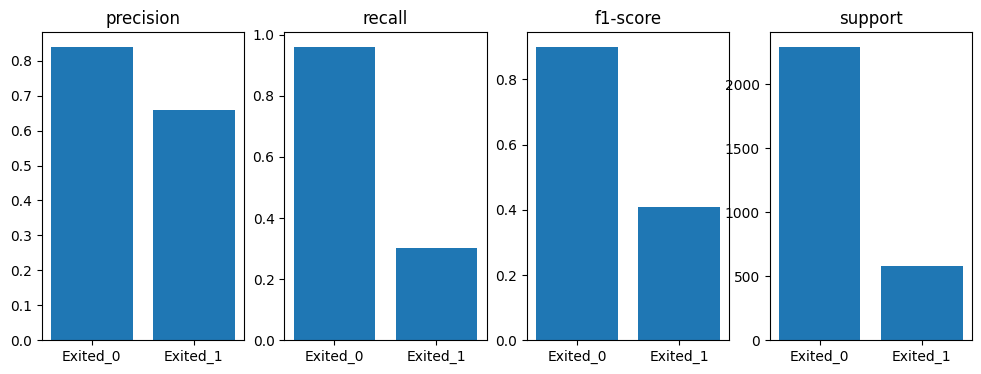

In [82]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Exited_0', 'Exited_1'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [83]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

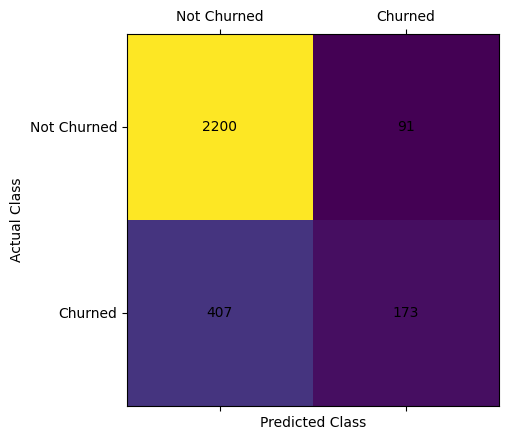

In [84]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [85]:
logmodel.score(X_train, Y_train)

0.8352993877855757

In [86]:
accuracy_score(Y_test, predLR)

0.8265412748171369

## Prediction using Support Vector Classifier

In [87]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [88]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.86      0.97      0.91      2291
        True       0.78      0.37      0.50       580

    accuracy                           0.85      2871
   macro avg       0.82      0.67      0.71      2871
weighted avg       0.84      0.85      0.83      2871



In [89]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

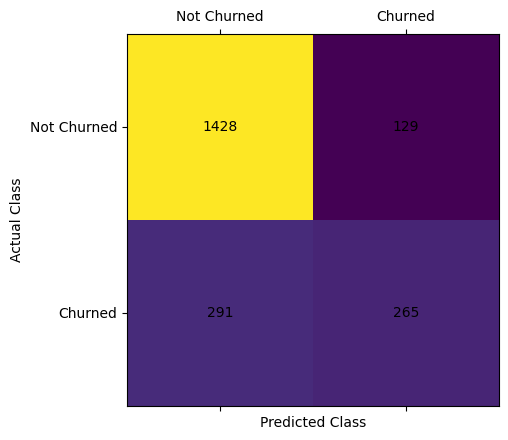

In [50]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')

        
# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [90]:
svc.score(X_train,Y_train)

0.8666567119605794

In [91]:
accuracy_score(Y_test, y_pred_svc)

0.8509230233368165

### Prediction using Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [93]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87      2291
        True       0.48      0.47      0.47       580

    accuracy                           0.79      2871
   macro avg       0.67      0.67      0.67      2871
weighted avg       0.79      0.79      0.79      2871



In [94]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

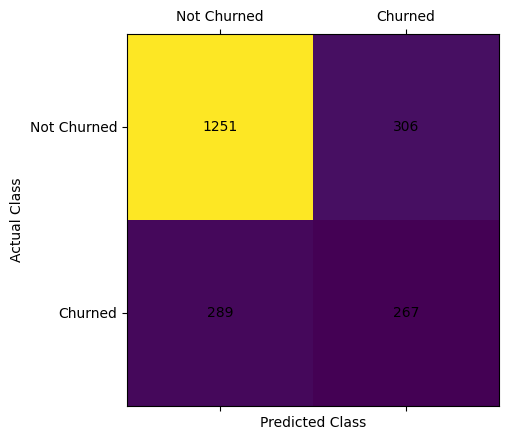

In [56]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [95]:
dtc.score(X_train,Y_train)

1.0

In [96]:
accuracy_score(Y_test, y_pred_dtc)

0.7882270985719262

## Prediction using KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [98]:
pred_knn = knn.predict(X_test)

In [99]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

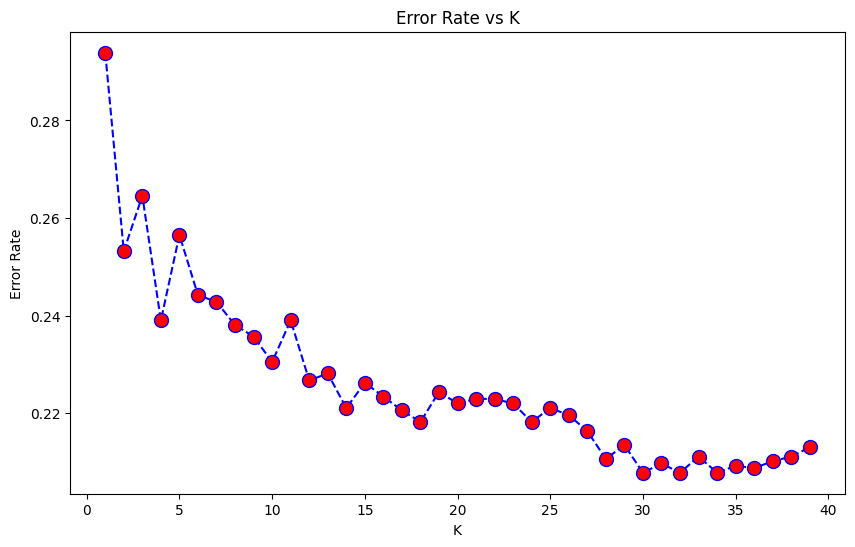

In [62]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [100]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

       False       0.83      0.98      0.90      2291
        True       0.72      0.22      0.34       580

    accuracy                           0.82      2871
   macro avg       0.77      0.60      0.62      2871
weighted avg       0.81      0.82      0.79      2871



In [101]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

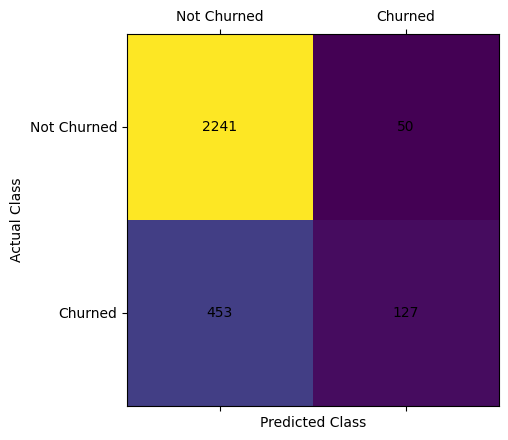

In [102]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [103]:
knn.score(X_train,Y_train)

0.8379871584291474

In [104]:
accuracy_score(Y_test, pred_knn)

0.8247997213514455

# Prediction Using Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rfc= RandomForestClassifier(random_state=42)

In [108]:
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

In [109]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87      2291
        True       0.47      0.47      0.47       580

    accuracy                           0.79      2871
   macro avg       0.67      0.67      0.67      2871
weighted avg       0.79      0.79      0.79      2871



In [111]:
confusion_matrix_rfc = confusion_matrix(Y_test, y_pred_rfc)

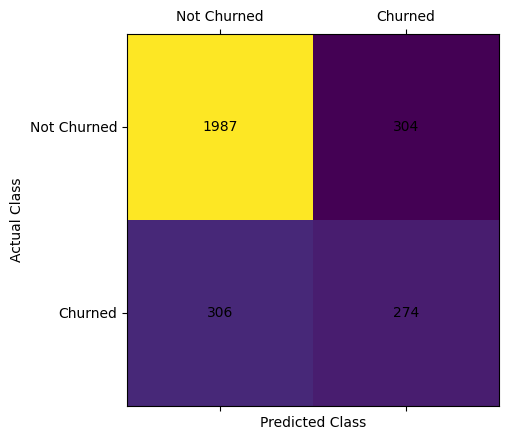

In [115]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_rfc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [113]:
rfc.score(X_train,Y_train)

1.0

In [114]:
accuracy_score(Y_test, y_pred_rfc)

0.8561476837338906

# Gradient Boost Classifier

In [117]:
gbc=GradientBoostingClassifier(random_state=42)

In [120]:
gbc.fit(X_train, Y_train)
y_pred_gbc = gbc.predict(X_test)

In [124]:
print(classification_report(Y_test, y_pred_gbc))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92      2291
        True       0.77      0.46      0.57       580

    accuracy                           0.86      2871
   macro avg       0.82      0.71      0.75      2871
weighted avg       0.85      0.86      0.85      2871



In [126]:
confusion_matrix_gbc = confusion_matrix(Y_test, y_pred_gbc)

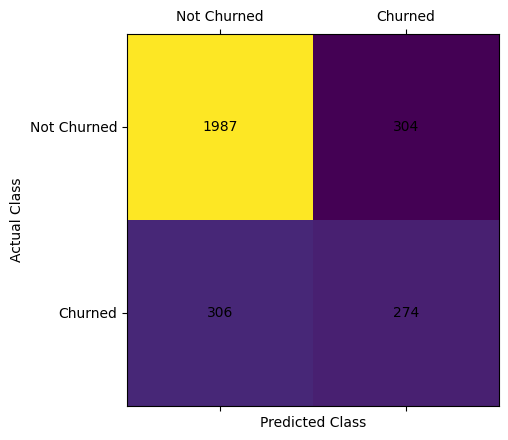

In [127]:
plt.matshow(confusion_matrix_gbc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [128]:
gbc.score(X_train,Y_train)

0.8753173062565328

In [130]:
accuracy_score(Y_test, y_pred_gbc)

0.8624172762103797

# Conclusion
The Gradient Boosting Classifier (GBC) appears to be the most effective model for predicting customer churn, achieving the highest test accuracy of 86.24%. It balances the trade-off between fitting the training data well and maintaining high performance on unseen test data.

Ensemble methods like Gradient Boosting and Random Forest tend to handle the complexities of the dataset better, making them preferable for the customer churn prediction task.